In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

import sys
# Replace this path for your machine
sys.path.append("C:/Users/nacs/Documents/GitHub/inspyred/inspyred/")
import ec
import inspyred

from random import Random
from time import time
import ec
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

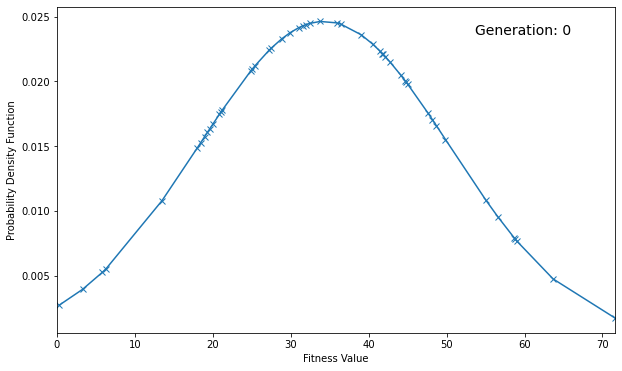

---------------------------------------------------------------------------------------------------------------------------
-70480515738239872 {'mom': [-0.8652150872409834, 0.934575500503219], 'dad': [0.18840555270211468, -4.17030922662874]}
8347289517020303474 {'mom': [-0.8652150872409834, 0.934575500503219], 'dad': [0.18840555270211468, -4.17030922662874]}
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-6273488073524972322 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0

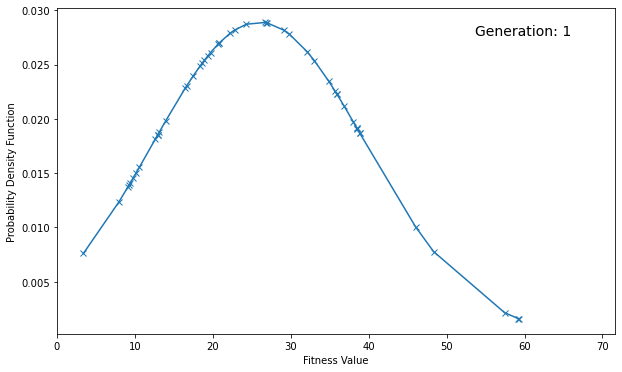

---------------------------------------------------------------------------------------------------------------------------
-70480515738239872 {'mom': [-0.8652150872409834, 0.934575500503219], 'dad': [0.18840555270211468, -4.17030922662874]}
8347289517020303474 {'mom': [-0.8652150872409834, 0.934575500503219], 'dad': [0.18840555270211468, -4.17030922662874]}
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-6273488073524972322 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0

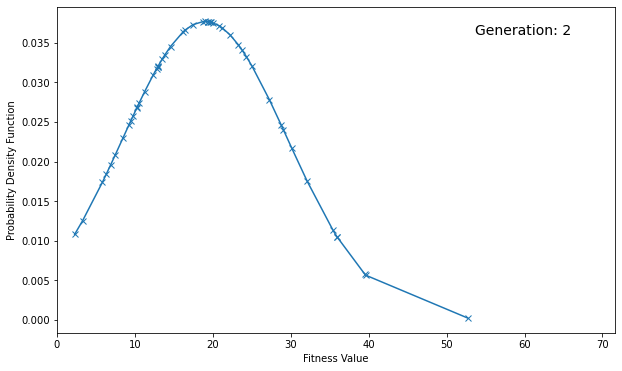

---------------------------------------------------------------------------------------------------------------------------
-70480515738239872 {'mom': [-0.8652150872409834, 0.934575500503219], 'dad': [0.18840555270211468, -4.17030922662874]}
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-6273488073524972322 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom':

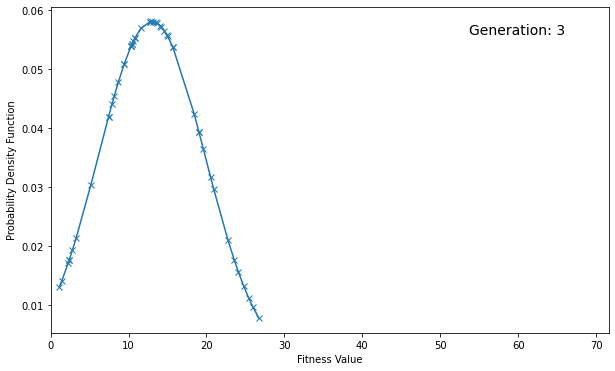

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

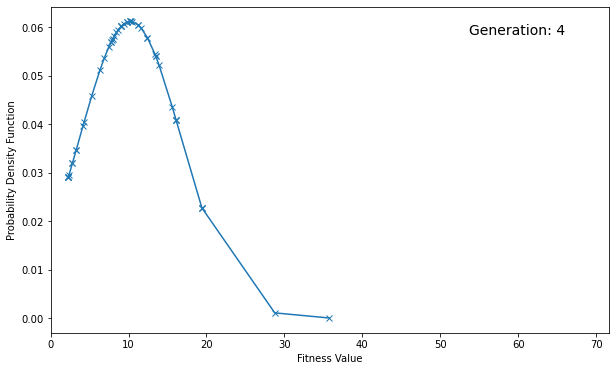

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

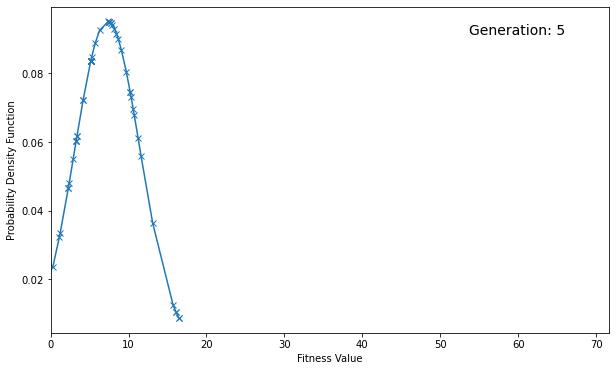

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

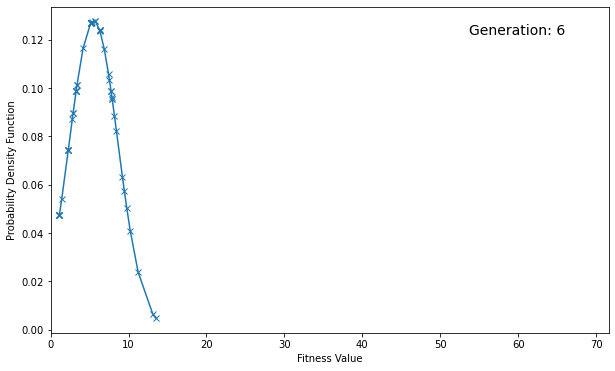

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

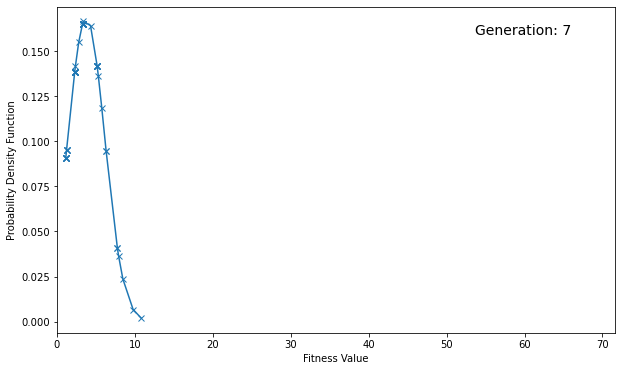

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

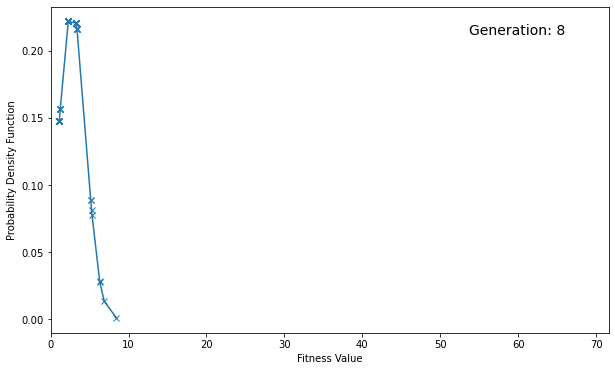

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

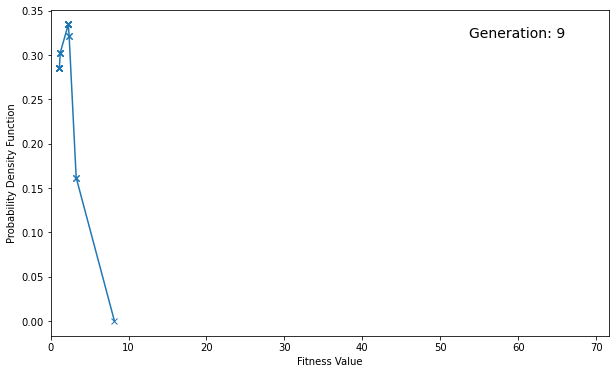

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

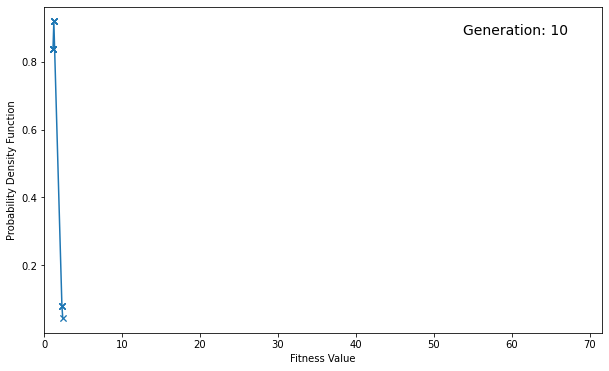

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

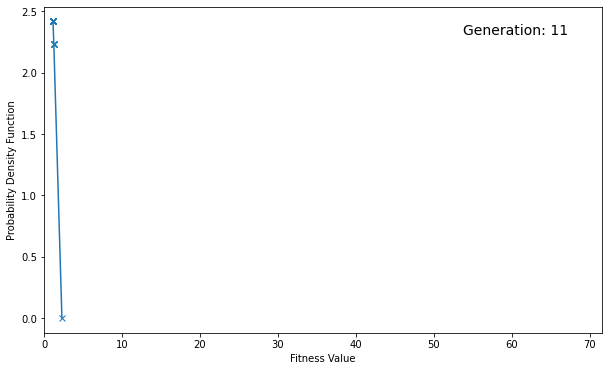

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

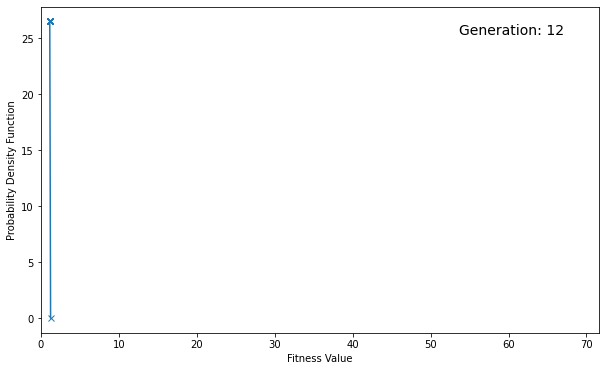

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


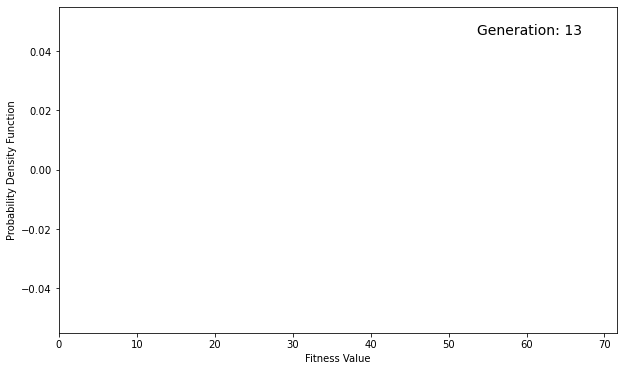

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


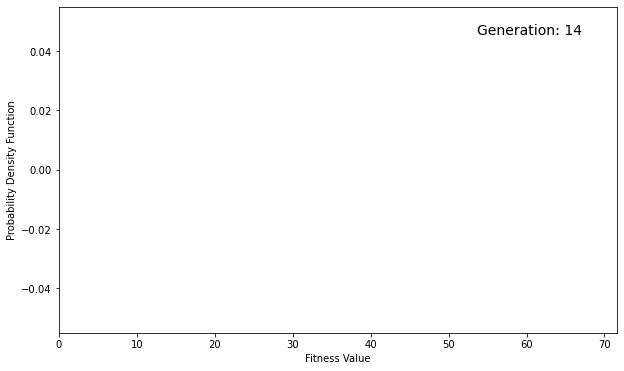

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

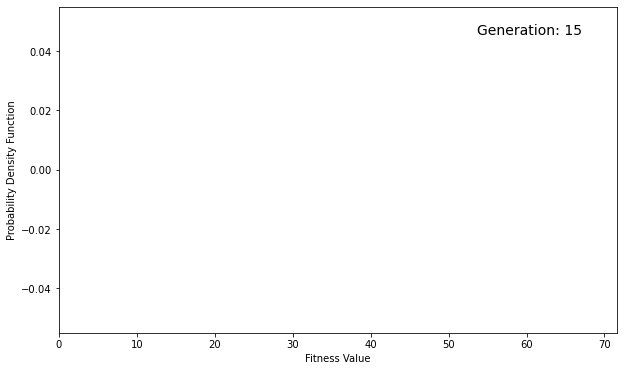

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


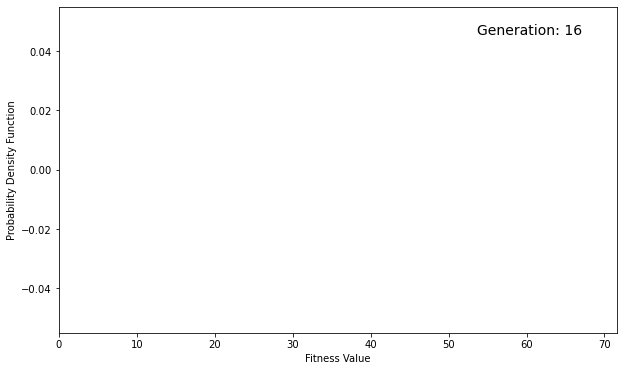

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

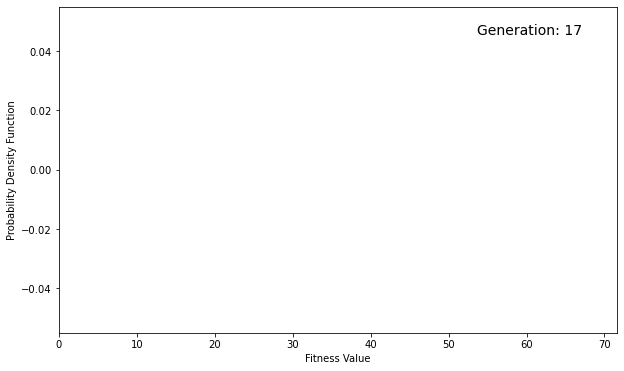

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


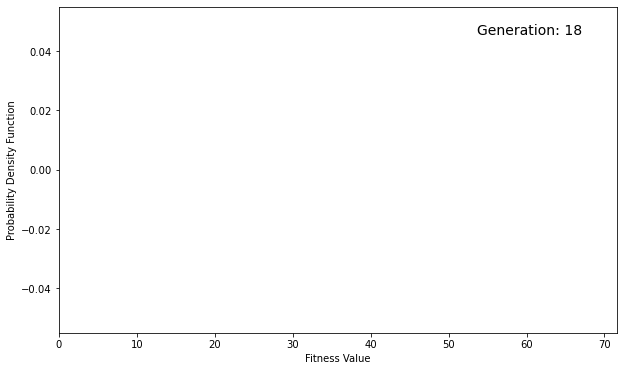

---------------------------------------------------------------------------------------------------------------------------
-1270717053088625925 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
4798898368119662998 {'mom': [1.5648486069597611, -3.031024740062427], 'dad': [-4.886184045732064, -0.9639470562982968]}
-5573804170593479166 {'mom': [-4.886184045732064, -0.9639470562982968], 'dad': [2.8391646320823156, 0.44905019078478947]}
-6391128125503407908 {'mom': [0.8005471487403444, -3.1371901555289003], 'dad': [0.8005471487403444, -3.1371901555289003]}
-8297552553455492657 {'mom': [-0.27193655506922454, -0.5330259486598186], 'dad': [-4.605413726046251, 2.8866069810359187]}
-8711864686636137391 {'mom': [3.0331235881125833, -1.96872215805505], 'dad': [-3.11861206705605, -2.1209792658035758]}
6059015413065784061 {'mom': [5.043000096097196, 3.0605666632861963], 'dad': [0.3662404451068948, 0.965588401734335]}
5274154913594197695 {'mom': [5.0

C:\Users\nacs\anaconda3\envs\applied_data_science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


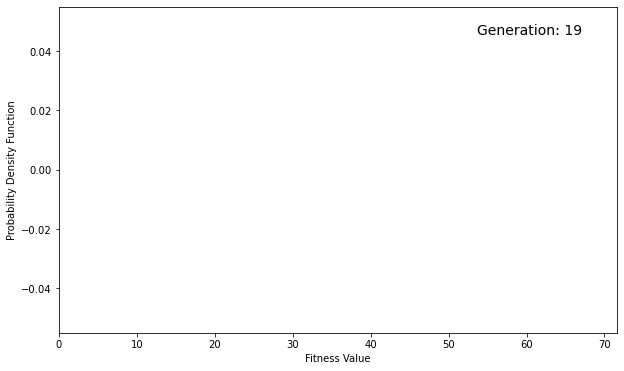

---------------------------------------------------------------------------------------------------------------------------
Best Solution: 
[-1.0166348354804313, -0.014643737795340783] : 1.1306317345331198


In [12]:
def my_observer(population, num_generations, num_evaluations, args):
    
    population_stats = inspyred.ec.analysis.fitness_statistics(population)
    best_fitness = population_stats['best']
    worst_fitness = population_stats['worst']
    median_fitness = population_stats['median']
    mean_fitness = population_stats['mean']
    
    if 'family_tree' in args:
        for child in args['family_tree']:
            print(child, args['family_tree'][child])
    
    if num_generations == 0:
        
        # At the first opportunity, initialize population statistic variables within args 
        # needed for plotting which will persist during each observer function call
        
        #print(population[0].candidate)
        
        args['mean_fitness'] = []
        args['standard deviation'] = []
        
        # Set xmax and xmin depending on whether this problem is trying to maximize or minimize fitness evaluation
        if population[0].maximize:
            args['xmax'] = best_fitness
            args['xmin'] = worst_fitness
        else:
            args['xmax'] = worst_fitness
            args['xmin'] = 0
    
    if num_generations == 1:
        print(args['_ec'].archive)
    
    # Adjust xmax if maximizing fitness so that it does not go outside the bounds of the graph
    if population[0].maximize:
        args['xmax'] = best_fitness
    
    fitness_list = sorted([individual.fitness for individual in population])
            
    stdev = np.std(fitness_list)
    args['standard deviation'].append(stdev)
    args['mean_fitness'].append(mean_fitness)

    fit = stats.norm.pdf(fitness_list, mean_fitness, stdev)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(fitness_list,fit,'-x')
    ax.text(0.75, 0.95, str("Generation: {}".format(num_generations)), transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel("Fitness Value")
    ax.set_ylabel("Probability Density Function")
    plt.xlim([args['xmin'], args['xmax']])
    
    plt.show()
    
    
    print('---------------------------------------------------------------------------------------------------------------------------')
    
if __name__ == '__main__':
    prng = Random()
    prng.seed(time()) 
    
    
    #items = [(12,1), (6,2), (8,3), (9,4), (13,5)]
    #problem = inspyred.benchmarks.Knapsack(20, items)
    
    problem = inspyred.benchmarks.Rastrigin(2)
    ea = inspyred.ec.GA(prng)
    ea.observer = my_observer
    #ea.variator = [n_point_crossover_w_inheritence, inspyred.ec.variators.bit_flip_mutation]
    #ea.observer = inspyred.ec.observers.population_observer
    #ea.observer = inspyred.ec.observers.stats_observer
    ea.terminator = inspyred.ec.terminators.evaluation_termination
    final_pop = ea.evolve(generator=problem.generator, 
                          evaluator=problem.evaluator, 
                          pop_size=50, 
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          max_evaluations=1000,
                          inheritance=True)
    best = max(final_pop)
    print('Best Solution: \n{0}'.format(str(best)))
